# Multiple linear regression

## Outline

-   Specifying the model.

-   Fitting the model: least squares.

-   Interpretation of the coefficients.

-   More on $F$-statistics.

-   Matrix approach to linear regression.

-   $T$-statistics revisited.

-   More $F$ statistics.

-   Tests involving more than one $\beta$.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm

/home/shk/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Prostate data

For more information on the [Gleason score](http://en.wikipedia.org/wiki/Gleason_Grading_System).

<table>
<tr><td><b>Variable</b></td><td><b>Description</b></td></tr>
<tr><td>lcavol</td><td>(log) Cancer Volume</td></tr>
<tr><td>lweight</td><td>(log) Weight</td></tr>
<tr><td>age</td><td>Patient age</td></tr>
<tr><td>lbph</td><td>(log) Vening Prostatic Hyperplasia</td></tr>
<tr><td>svi</td><td>Seminal Vesicle Invasion</td></tr>
<tr><td>lcp</td><td>(log) Capsular Penetration</td></tr>
<tr><td>gleason</td><td>Gleason score</td></tr>
<tr><td>pgg45</td><td>Percent of Gleason score 4 or 5</td></tr>
<tr><td>lpsa</td><td>(log) Prostate Specific Antigen</td></tr>
<tr><td>train</td><td>Label for test / training split</td></tr>
</table>

The dataset is scraped from [`ElemStatLearn`](https://cran.r-project.org/web/packages/ElemStatLearn/index.html) R-package and is saved as `05_prostate.csv` in the `data` folder accompanying this notebook. 

In [2]:
prostate=pd.read_csv(r'./data/05_prostate.csv',index_col=0)

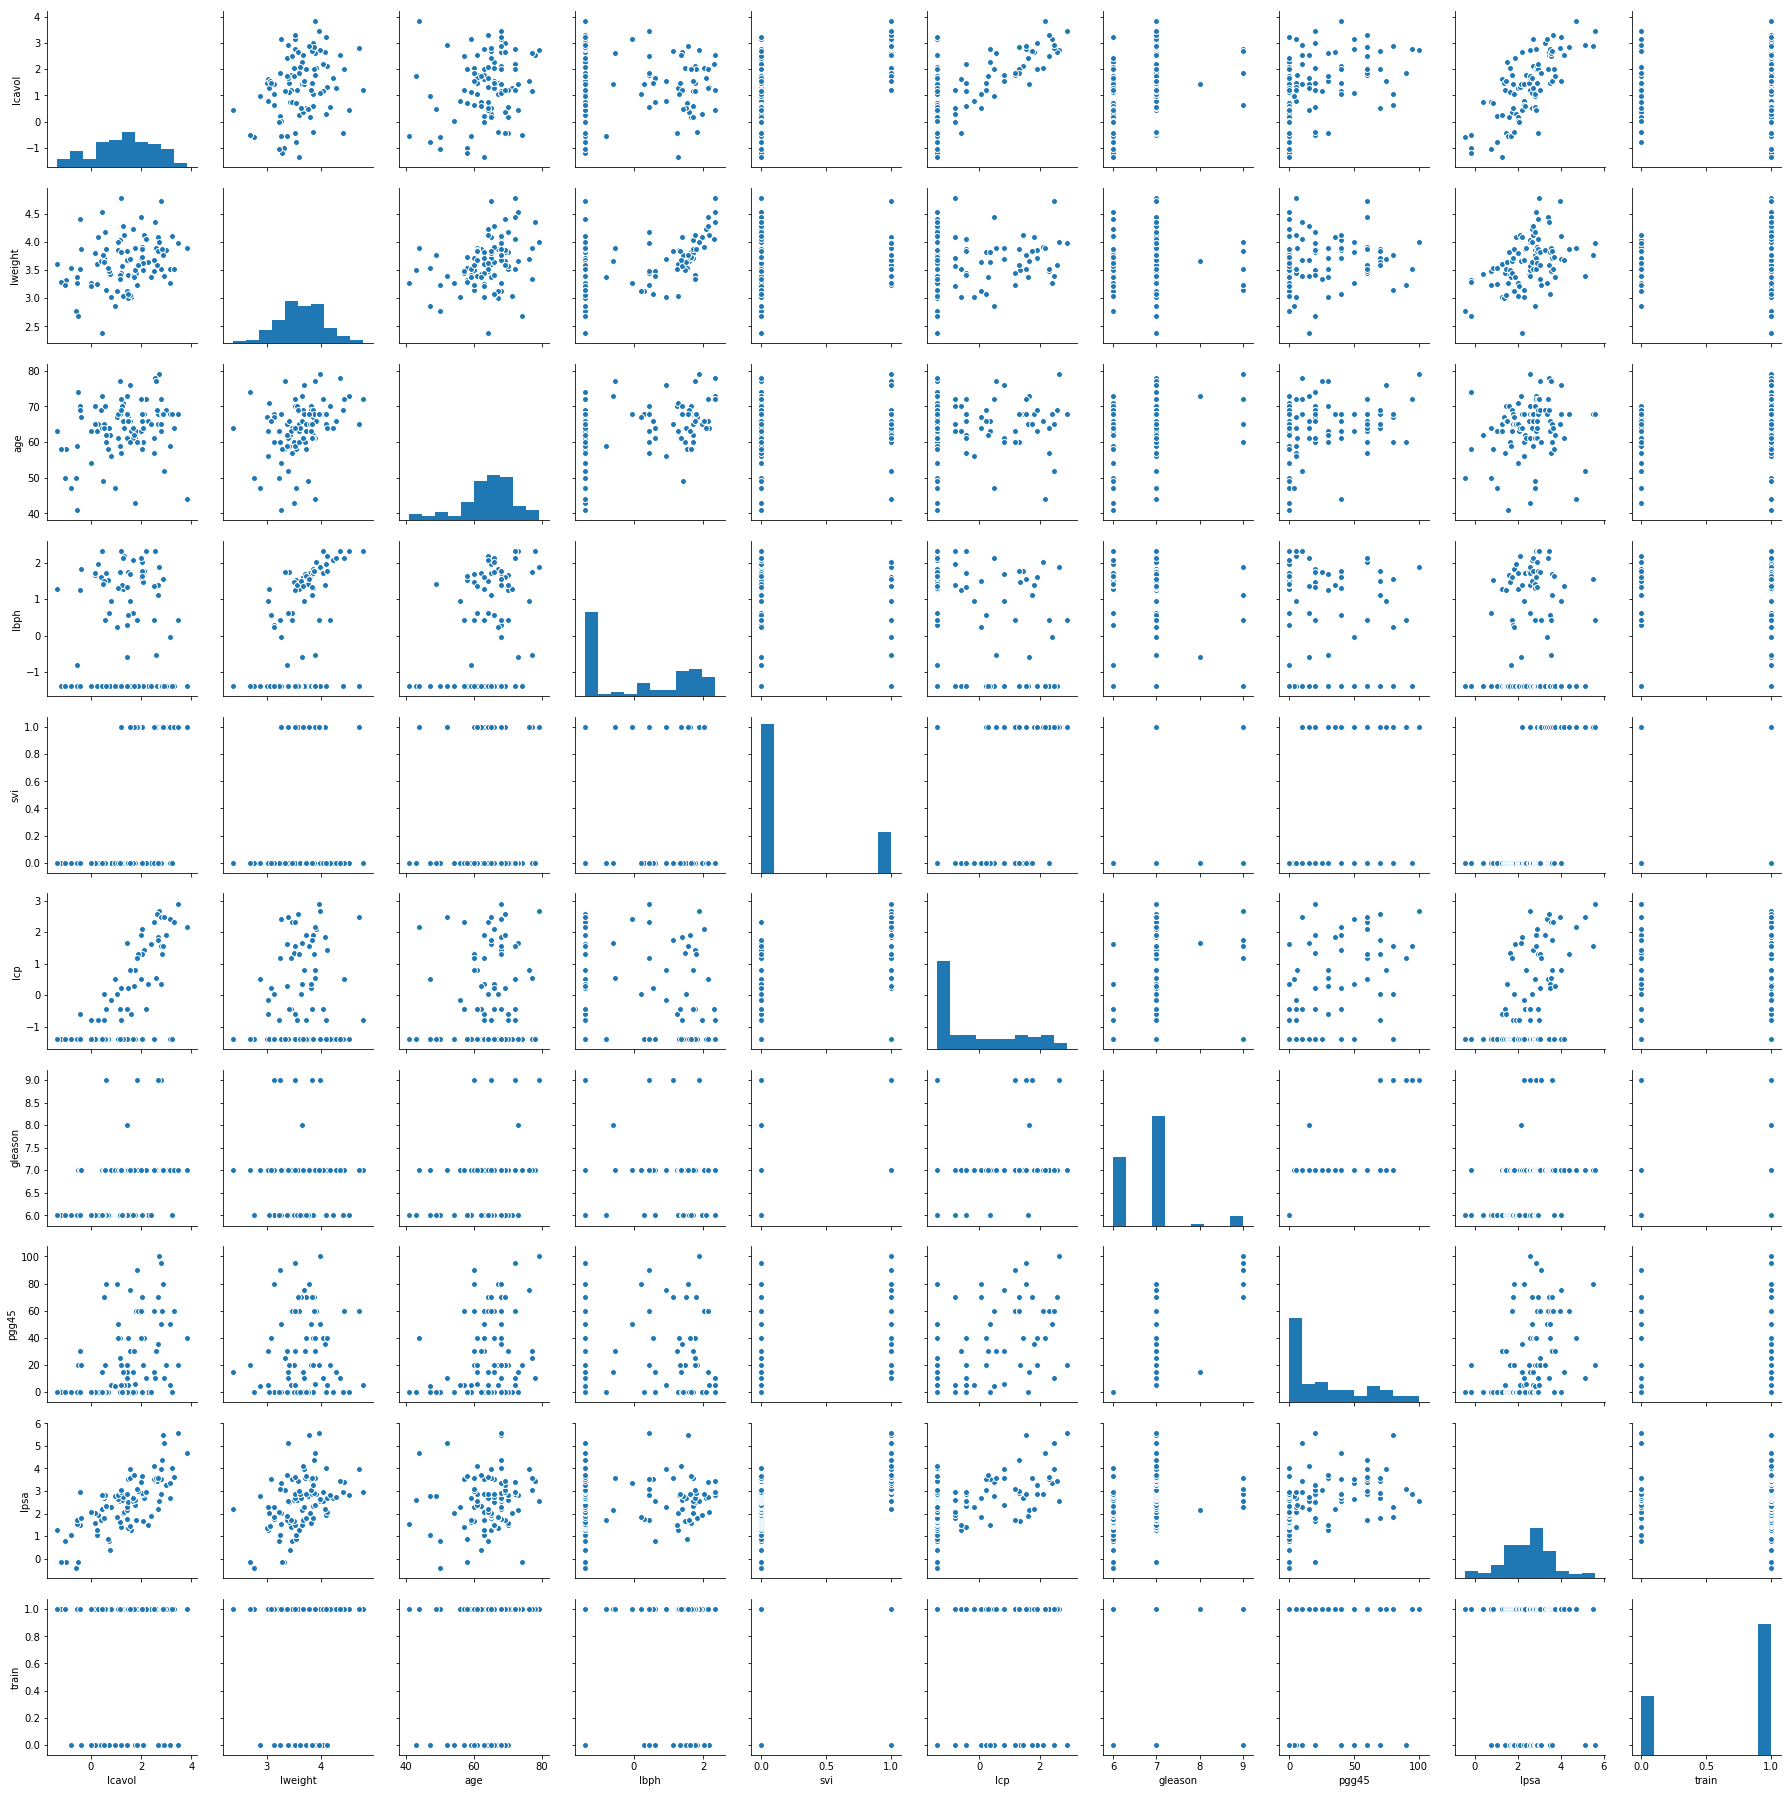

In [3]:
sns.pairplot(prostate)
plt.show()

## Specifying the model

- We will use variables `lcavol, lweight, age, lbph, svi, lcp` and `pgg45` to predict `lpsa`.

-   Rather than one predictor, we have $p=7$ predictors.

### Model

-   $$Y_i = \beta_0 + \beta_1 X_{i1} + \dots + \beta_p X_{ip} + \varepsilon_i$$

-   Errors $\varepsilon$ are assumed independent $N(0,\sigma^2)$, as in
    simple linear regression.

-   Coefficients are called (partial) regression coefficients because
    they "allow" for the effect of other variables.

## Geometry of Least Squares

<img src="http://stats191.stanford.edu/figs/axes_multiple_full.svg">

## Fitting the model

-   Just as in simple linear regression, model is fit by minimizing
    $$\begin{aligned}
       SSE(\beta_0, \dots, \beta_p) &= \sum_{i=1}^n\left(Y_i - \left(\beta_0 + \sum_{j=1}^p \beta_j \
X_{ij} \right) \right)^2 \\
       &= \|Y - \widehat{Y}(\beta)\|^2
       \end{aligned}$$

-   Minimizers:
    $\widehat{\beta} = (\widehat{\beta}SSE_0, \dots, \widehat{\beta}_p)$
    are the "least squares estimates": are also normally distributed as
    in simple linear regression.

In [4]:
prostate_lm = smf.ols('lpsa ~ lcavol + lweight + age + lbph + svi + lcp + pgg45', data=prostate).fit()
prostate_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     25.01
Date:                Thu, 08 Feb 2018   Prob (F-statistic):           1.54e-18
Time:                        21:20:59   Log-Likelihood:                -98.303
No. Observations:                  97   AIC:                             212.6
Df Residuals:                      89   BIC:                             233.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4942      0.874      0.566      0.573      -1.242       2.230
lcavol         0.5695      0.086      6.634      0.000       0.399       0.740
lweight        0.6144      0.198      3.096      0.003       0.220       1.009
age           -0.0209      0.011     -1.905      0.060      -0.043       0.001
lbph           0.0974      0.058      1.691      0.094      -0.017       0.212
svi            0.7524      0.238      3.159      0.002       0.279       1.226
lcp           -0.1050      0.089     -1.175      0.243      -0.282       0.073
pgg45          0.0053      0.003      1.573      0.119      -0.001       0.012
==============================================================================
Omnibus:                        0.550   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.759   Jarque-Bera (JB):                0.175
Skew:                           0.018   Prob(JB):                        0.916
Kurtosis:                       3.205   Cond. No.                         875.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Estimating $\sigma^2$

-   As in simple regression
    $$\widehat{\sigma}^2 = \frac{SSE}{n-p-1} \sim \sigma^2 \cdot \frac{\chi^2_{n-p-1}}{n-p\
-1}$$
    independent of $\widehat{\beta}$.

-   Why $\chi^2_{n-p-1}$? Typically, the degrees of freedom in the
    estimate of $\sigma^2$ is
    $n-\# \text{number of parameters in regression function}$.

In [5]:
print(prostate_lm.df_resid)
sigma_hat = np.sqrt( (prostate_lm.resid**2).sum() / prostate_lm.df_resid)
print(sigma_hat)

89.0
0.695955878032


## Interpretation of $\beta_j$'s

-   Take $\beta_1=\beta_{\tt{lcavol}}$ for example. This is the amount the average `lpsa`
    rating increases for one “unit” of increase in `lcavol`, keeping
    everything else constant.

-   We refer to this as the effect of `lcavol` *allowing
    for* or *controlling for* the other variables.
    
- For example, let's take the 10th case in our data and change `lcavol` by 1 unit.

In [6]:
vals4pred=pd.concat([prostate.loc[[10],:]]*2).reset_index(drop=True)
vals4pred.loc[1,'lcavol']+=1

Yhat = prostate_lm.predict(exog=vals4pred)
Yhat

0    1.307754
1    1.877300
dtype: float64

Our regression model says that this difference should be $\hat{\beta}_{\tt lcavol}$.

In [7]:
[Yhat[1]-Yhat[0], prostate_lm.params['lcavol'] ]

[0.56954603157399575, 0.56954603157399564]

## Partial regression coefficients

-   The term *partial* refers to the fact that the coefficient $\beta_j$
    represent the partial effect of ${X}_j$ on ${Y}$, i.e. after
    the effect of all other variables have been removed.

-   Specifically,
    $$Y_i - \sum_{l=1, l \neq j}^k X_{il} \beta_l = \beta_0 + \beta_j X_{ij} + \varepsilon_i.$$

-   Let $e_{i,(j)}$ be the residuals from regressing ${Y}$ onto all
    ${X}$'s except ${X}_j$, and let $X_{i,(j)}$ be the
    residuals from regressing ${X}_j$ onto all ${X}$'s
    except ${X}_j$.

-   If we regress $e_{i,(j)}$ against $X_{i,(j)}$, the coefficient is
    *exactly* the same as in the original model.


Let's verify this interpretation of regression coefficients.

In [8]:
d = {'partial_resid_lcavol': smf.ols('lcavol ~  lweight + age + lbph + svi + lcp + pgg45', 
                                     data=prostate).fit().resid,
     'partial_resid_lpsa'  : smf.ols(  'lpsa ~  lweight + age + lbph + svi + lcp + pgg45',
                                     data=prostate).fit().resid}
partial_resid=pd.DataFrame.from_dict(d)
smf.ols('partial_resid_lpsa ~ partial_resid_lcavol', data=partial_resid).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     partial_resid_lpsa   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     46.98
Date:                Thu, 08 Feb 2018   Prob (F-statistic):           7.15e-10
Time:                        21:21:00   Log-Likelihood:                -98.303
No. Observations:                  97   AIC:                             200.6
Df Residuals:                      95   BIC:                             205.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.052e-14      0.068  -1.54e-13      1.000      -0.136       0.136
partial_resid_lcavol     0.5695      0.083      6.854      0.000       0.405       0.735
==============================================================================
Omnibus:                        0.550   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.759   Jarque-Bera (JB):                0.175
Skew:                           0.018   Prob(JB):                        0.916
Kurtosis:                       3.205   Cond. No.                         1.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Goodness of fit for multiple regression

$$\begin{aligned}
   SSE &= \sum_{i=1}^n(Y_i - \widehat{Y}_i)^2 \\
   SSR &= \sum_{i=1}^n(\overline{Y} - \widehat{Y}_i)^2 \\
   SST &= \sum_{i=1}^n(Y_i - \overline{Y})^2 \\
   R^2 &= \frac{SSR}{SST}
   \end{aligned}$$ 
   
   $R^2$ is called the *multiple correlation
coefficient* of the model, or the *coefficient of multiple
determination*.

The sums of squares and $R^2$ are defined analogously
to those in simple linear regression.

In [9]:
Y = prostate.lpsa
n = Y.size
SST = ((Y - Y.mean())**2).sum()
MST = SST / (n - 1)

SSE = (prostate_lm.resid**2).sum()
MSE = SSE / prostate_lm.df_resid

SSR = SST - SSE
MSR = SSR / (n - prostate_lm.df_resid - 1 )
print(MST,MSE,MSR)

1.3324756133880375 0.484354584167 12.1157286992


## Adjusted $R^2$

-   As we add more and more variables to the model (even random ones),
    $R^2$ will increase to 1.

-   Adjusted $R^2$ tries to take this into account by replacing sums of
    squares by *mean squares*
    $$R^2_a = 1 - \frac{SSE/(n-p-1)}{SST/(n-1)} = 1 - \frac{MSE}{MST}.$$

## Goodness of fit test


-   As in simple linear regression, we measure the goodness of fit of
    the regression model by
    $$F = \frac{MSR}{MSE} = \frac{\|\overline{Y}\cdot {1} - \widehat{{Y}}\|^2/p}{\\
\|Y - \widehat{{Y}}\|^2/(n-p-1)}.$$

-   Under $H_0:\beta_1 = \dots = \beta_p=0$, $$F \sim F_{p, n-p-1}$$ so
    reject $H_0$ at level $\alpha$ if $F > F_{p,n-p-1,1-\alpha}.$

In [10]:
print(prostate_lm.summary())
F = MSR / MSE
print(F)

                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     25.01
Date:                Thu, 08 Feb 2018   Prob (F-statistic):           1.54e-18
Time:                        21:21:01   Log-Likelihood:                -98.303
No. Observations:                  97   AIC:                             212.6
Df Residuals:                      89   BIC:                             233.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4942      0.874      0.566      0.5

## Geometry of Least Squares

<img src="http://stats191.stanford.edu/figs/axes_multiple_full.svg">

## Geometry of Least Squares

<img src="http://stats191.stanford.edu/figs/axes_multiple_reduced.svg">

## Geometry of Least Squares

<img src="http://stats191.stanford.edu/figs/axes_multiple.svg">

## Intuition behind the $F$ test (?)

-   The $F$ statistic is a ratio of lengths of orthogonal vectors
    (divided by degrees of freedom).

- Let $\mu=E(Y)=X\beta$ be the true mean vector for $Y$.

-   We can prove that our model implies (whether $H_0$ is true or not) $$\begin{aligned}
       \mathbb{E}\left(MSR\right) &= \sigma^2 + \underbrace{\|{\mu} - \overline{\mu} \cdot {1}\|^2 / p}_{(*)} \\
       \mathbb{E}\left(MSE\right) &= \sigma^2 \\
       \mu_i &= \mathbb{E}(Y_i) = \beta_0 + X_{i1} \beta_1  + \dots +  X_{ip} \beta_p
       \end{aligned}$$ 
       
- If $H_0$ is true, then $(*)=0$ and $\mathbb{E}(MSR)=\mathbb{E}(MSE)=\sigma^2$ so the $F$ should not be
too different from 1.

-   If $F$ is large, it is evidence that $\mathbb{E}\left(MSR\right) \neq \sigma^2$, i.e. $H_0$ is
    false.

### Where does (*) come from?

Least squares regression can be expressed in terms of orthogonal projections. 
That is, 
$$
\hat{Y} = PY
$$
for some $P_{n \times n}$ where $P=P^T$ and $P^2=P$ (this makes it an orthogonal
projection matrix). We will call this $P_F$ where $F$ stands for "full". Recall that for
any projection matrix  and any vector $y$
$$
\begin{aligned}
\|Py\|^2 &= (Py)^T(Py) \\
&= y^TP^TPy  \\
& = y^TP^2y \\
&= y^TPy.
\end{aligned}
$$

Let $P_R$ denote projection onto the 1-dimensional model determined by the 1 vector. 
Note that $P_F-P_R$ is again a projection: it projects onto the 
orthogonal complement of the 1 vector within the $(p+1)$-dimensional full model. So, it
is a projection onto a $p$ dimensional space.

We see that 
$$
\begin{aligned}
SSR &= \|(P_F-P_R)Y\|^2 \\
&= Y^T(P_F-P_R)Y \\
&= (\mu+\epsilon)^T(P_F-P_R)(\mu+\epsilon) \\
&= \mu^T(P_F-P_R)\mu + 2 \mu^T(P_F-P_R)\epsilon + \epsilon^T(P_F-P_R)\epsilon \\
&= \|\mu - \bar{\mu} \cdot 1\|^2 + 2 \mu^T(P_F-P_R)\epsilon + \epsilon^T(P_F-P_R)\epsilon \\
\end{aligned}
$$

Now, let's take expectations. The first term is a constant, the cross term
has expected value zero and the expected value of the final term is
$$
p \cdot \sigma^2.
$$
This comes from the fact that
$$
\epsilon^T(P_F-P_R)\epsilon = \|(P_F-P_R)\epsilon\|^2 \sim \sigma^2 \chi^2_p.
$$


## $F$-test revisited

The $F$ test can be thought of as comparing two models:

-   *Full (bigger) model :*

    $$Y_i = \beta_0 + \beta_1 X_{i1} + \dots \beta_p X_{ip} + \varepsilon_i$$

-   *Reduced (smaller) model:*

    $$Y_i = \beta_0  + \varepsilon_i$$

-   The $F$-statistic has the form
    $$F=\frac{(SSE(R) - SSE(F)) / (df_R - df_F)}{SSE(F) / df_F}.$$

- **Note: the smaller model should be nested within the bigger model.**

## Geometry of Least Squares

<img src="http://stats191.stanford.edu/figs/axes_general.svg">

# Matrix formulation


$${ Y}_{n \times 1} = {X}_{n \times (p + 1)} {\beta}_{(p+1) \times 1} + {\varepsilon}_{n \times 1}$$

-   ${X}$ is called the *design matrix* of the model

-   ${\varepsilon} \sim N(0, \sigma^2 I_{n \times n})$ is
    multivariate normal

## $SSE$ in matrix form

$$SSE(\beta) = ({Y} - {X} {\beta})'({Y} - {X} {\beta}) = \|Y-X\beta\|^2_2$$

## Design matrix

Design matrix

-   The design matrix is the $n \times (p+1)$ matrix with entries
    $$X =
       \begin{pmatrix}
       1 & X_{11} & X_{12} & \dots & X_{1,p} \\
       \vdots &   \vdots & \ddots & \vdots \\
       1 & X_{n1} & X_{n2} &\dots & X_{n,p} \\
       \end{pmatrix}$$

The design matrix in our model looks like:

In [11]:
X=pd.DataFrame(data=prostate_lm.model.exog, columns=prostate_lm.model.exog_names)
X.head()

,Intercept,lcavol,lweight,age,lbph,svi,lcp,pgg45
0,1.0,-0.579818,2.769459,50.0,-1.386294,0.0,-1.386294,0.0
1,1.0,-0.994252,3.319626,58.0,-1.386294,0.0,-1.386294,0.0
2,1.0,-0.510826,2.691243,74.0,-1.386294,0.0,-1.386294,20.0
3,1.0,-1.203973,3.282789,58.0,-1.386294,0.0,-1.386294,0.0
4,1.0,0.751416,3.432373,62.0,-1.386294,0.0,-1.386294,0.0


The design matrix is the same as the data with an additional `Intercept` column 

In [12]:
prostate.loc[:,['lcavol','lweight','age','lbph','svi','lcp','pgg45']].head()

,lcavol,lweight,age,lbph,svi,lcp,pgg45
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,0
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,0
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,20
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,0
5,0.751416,3.432373,62,-1.386294,0,-1.386294,0


## Least squares solution


-   Normal equations
    $$\frac{\partial}{\partial \beta_j} SSE \biggl|_{\beta = \widehat{\beta}_{}} = -2 \left({Y\
} - {X} \widehat{\beta}_{} \right)^T {X}_j = 0, \qquad 0 \leq j \leq p.$$

-   Equivalent to $$\begin{aligned}
       ({Y} - {X}{\widehat{\beta}_{}})^T{X} &= 0 \\
       {\widehat{\beta}} &= ({X}^T{X})^{-1}{X}^T{Y}
       \end{aligned}$$

-   Properties: $$\widehat{\beta} \sim N(\beta, \sigma^2 (X^TX)^{-1}).$$

## Multivariate Normal

To obtain the distribution of $\hat{\beta}$ we used the following fact about the 
multivariate Normal.

** Suppose $Z \sim N(\mu,\Sigma)$. Then, for any fixed matrix $A$
$$
AZ \sim N(A\mu, A\Sigma A^T).
$$**

(It goes without saying that the dimensions of the matrix must agree with those of $Z$.)

### How did we derive the distribution of $\hat{\beta}$?

Above, we saw that $\hat{\beta}$ is equal to a matrix times $Y$. The matrix form of our
model is
$$
Y \sim N(X\beta, \sigma^2 I).
$$

Therefore,
$$
\begin{aligned}
\hat{\beta} &\sim N\left((X^TX)^{-1}X^T (X\beta), (X^TX)^{-1}X^T X (\sigma^2 I) (X^TX)^{-1}\right) \\
&\sim N(\beta, \sigma^2 (X^TX)^{-1}).
\end{aligned}
$$

## Least squares solution

Let's verify our equations for $\hat{\beta}$.

In [13]:
beta= np.linalg.inv(X.T.values @ X.values) @ X.T.values @ Y.values
pd.Series(index=X.columns, data=beta)

Intercept    0.494155
lcavol       0.569546
lweight      0.614420
age         -0.020913
lbph         0.097353
svi          0.752397
lcp         -0.104959
pgg45        0.005324
dtype: float64

In [14]:
print(prostate_lm.params)

Intercept    0.494155
lcavol       0.569546
lweight      0.614420
age         -0.020913
lbph         0.097353
svi          0.752397
lcp         -0.104959
pgg45        0.005324
dtype: float64


# Inference for multiple regression

## Regression function at one point

  One thing one might want to *learn* about the regression function in
    the prostate example is something about the regression function at
    some fixed values of ${X}_{1}, \dots, {X}_{7}$, i.e. what
    can be said about
    $$
 \begin{aligned}
  \beta_0 + 1.3 \cdot \beta_1  &+ 3.6 \cdot \beta_2  + 64 \cdot \beta_3 + \\
    0.1 \cdot \beta_4 &+ 0.2 \cdot \beta_5 - 0.2 \cdot \beta_6 + 25 \cdot \beta_7  
   \end{aligned}$$
    roughly the regression function at вЂњtypicalвЂќ values of the
    predictors.

   The expression above is equivalent to
    $$\sum_{j=0}^7 a_j \beta_j, \qquad a=(1,1.3,3.6,64,0.1,0.2,-0.2,25).$$


## Confidence interval for $\sum_{j=0}^p a_j \beta_j$

-   Suppose we want a $(1-\alpha)\cdot 100\%$ CI for
    $\sum_{j=0}^p a_j\beta_j$.

-   Just as in simple linear regression:

    $$\sum_{j=0}^p a_j \widehat{\beta}_j \pm t_{1-\alpha/2, n-p-1} \cdot SE\left(\sum_{j=0}^p a_j\widehat{\beta}_j\right).$$

`R` will form these coefficients for each coefficient separately when using the `confint` function. These linear combinations are of the form

$$
a_{\tt lcavol} = (0,1,0,0,0,0,0,0)
$$
so that
$$
a_{\tt lcavol}^T\widehat{\beta} = \widehat{\beta}_1 = {\tt coef(prostate.lm)[2]}
$$

In [15]:
prostate_lm.conf_int(alpha=0.10)

,0,1
Intercept,-0.957849,1.946158
lcavol,0.426855,0.712237
lweight,0.284566,0.944274
age,-0.039160,-0.002667
lbph,0.001639,0.193066
svi,0.356505,1.148289
lcp,-0.253468,0.043549
pgg45,-0.000301,0.010950


In [16]:
d=dict(lcavol=1.3, lweight=3.6, age=64, lbph=0.1, svi=0.2, lcp=-.2, pgg45=25)
exogs=pd.DataFrame(data=[d.values()],index=pd.Index(data=[0]),columns=d.keys())

predictions=prostate_lm.get_prediction(exog=exogs)
predictions.summary_frame(alpha=0.10)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.422332,0.07102,2.304287,2.540378,1.259538,3.585127


`mean_ci_lower` and `mean_ci_upper` are the values to look at. 

## $T$-statistics revisited

Of course, these confidence intervals are based on the standard ingredients of a
$T$-statistic.

-   Suppose we want to test $$H_0:\sum_{j=0}^p a_j\beta_j= h.$$ As in
    simple linear regression, it is based on
    $$T = \frac{\sum_{j=0}^p a_j \widehat{\beta}_j - h}{SE(\sum_{j=0}^p a_j \widehat{\beta\
}_j)}.$$

-   If $H_0$ is true, then $T \sim t_{n-p-1}$, so we reject $H_0$ at
    level $\alpha$ if $$\begin{aligned}
       |T| &\geq t_{1-\alpha/2,n-p-1}, \qquad \text{ OR} \\
       p-\text{value} &= {\tt 2*(1-pt(|T|, n-p-1))} \leq \alpha.
       \end{aligned}$$


`statsmodels` produces these in the `coef` table `summary` of the linear regression model. Again, each of these 
linear combinations is a vector $a$ with only one non-zero entry like $a_{\tt lcavol}$ above.


In [17]:
print(prostate_lm.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4942      0.874      0.566      0.573      -1.242       2.230
lcavol         0.5695      0.086      6.634      0.000       0.399       0.740
lweight        0.6144      0.198      3.096      0.003       0.220       1.009
age           -0.0209      0.011     -1.905      0.060      -0.043       0.001
lbph           0.0974      0.058      1.691      0.094      -0.017       0.212
svi            0.7524      0.238      3.159      0.002       0.279       1.226
lcp           -0.1050      0.089     -1.175      0.243      -0.282       0.073
pgg45          0.0053      0.003      1.573      0.119      -0.001       0.012


Let's do a quick calculation to remind ourselves the relationships of the variables
in the table above.

In [18]:
T1 = 0.56954 / 0.08584
P1 = 2 * (1 - sp.stats.t.cdf(abs(T1), 89))
print(T1,P1)

6.634902143522834 2.45611930794e-09


These were indeed the values for `lcavol` in the `summary` table.

## One-sided tests

-   Suppose, instead, we wanted to test the one-sided hypothesis
    $$H_0:\sum_{j=0}^p a_j\beta_j \leq  h, \  \text{vs.} \ H_a: \sum_{j=0}^p a_j\beta_j > \
 h$$

-   If $H_0$ is true, then $T$ is no longer exactly $t_{n-p-1}$ but we still have
    $$\mathbb{P}\left(T > t_{1-\alpha, n-p-1}\right) \leq 1 - \alpha$$
    so we reject $H_0$ at level $\alpha$ if $$\begin{aligned}
       T &\geq t_{1-\alpha,n-p-1}, \qquad \text{ OR} \\
       p-\text{value} &= {\tt (1-pt(T, n-p-1))} \leq \alpha.
       \end{aligned}$$
       
- **Note: the decision to do a one-sided $T$ test should be made *before* looking at the $T$ statistic. Otherwise, the probability of a false positive is doubled!**


## Standard error of $\sum_{j=0}^p a_j \widehat{\beta}_j$

- In order to form these $T$ statistics, we need the $SE$ of our estimate $\sum_{j=0}^p a_j \widehat{\beta}_j$.

-   Based on matrix approach to regression
    $$SE\left(\sum_{j=0}^p a_j\widehat{\beta}_j \right) = SE\left(a^T\widehat{\beta} \right) = \sqrt{\widehat{\sigma}^2 a^T (X^TX\
)^{-1} a}.$$

-   Don't worry too much about specific implementation – for much of the effects
    we want `statsmodels` will do this for you in general.

In [19]:
Y_hat = X.values @ beta
sigma_hat = np.sqrt( ((Y.values - Y_hat)**2).sum() / (n - X.columns.size) ) 
cov_beta=sigma_hat**2 * np.linalg.inv (X.T.values @ X.values )
pd.DataFrame(cov_beta,index=X.columns, columns=X.columns)

,Intercept,lcavol,lweight,age,lbph,svi,lcp,pgg45
Intercept,0.763119,0.009968,-0.112714,-0.005758,0.024821,0.010342,0.002077,0.000033
lcavol,0.009968,0.007370,-0.003268,-0.000130,0.000398,-0.002643,-0.003502,0.000007
lweight,-0.112714,-0.003268,0.039382,-0.000409,-0.004541,-0.004105,0.000062,0.000069
age,-0.005758,-0.000130,-0.000409,0.000121,-0.000147,-0.000073,0.000143,-0.000009
lbph,0.024821,0.000398,-0.004541,-0.000147,0.003316,0.002136,-0.000142,-0.000012
svi,0.010342,-0.002643,-0.004105,-0.000073,0.002136,0.056730,-0.008863,-0.000052
lcp,0.002077,-0.003502,0.000062,0.000143,-0.000142,-0.008863,0.007983,-0.000137
pgg45,0.000033,0.000007,0.000069,-0.000009,-0.000012,-0.000052,-0.000137,0.000011


The standard errors of each coefficient estimate are the square root of the diagonal entries. They appear as the
`Std. Error` column in the `coef` table.

In [20]:
pd.Series( np.sqrt(cov_beta.diagonal()), index=X.columns)

Intercept    0.873567
lcavol       0.085847
lweight      0.198449
age          0.010978
lbph         0.057584
svi          0.238180
lcp          0.089347
pgg45        0.003385
dtype: float64

Generally, we can find our estimate of the covariance function as follows:

In [21]:
prostate_lm.cov_params()

,Intercept,lcavol,lweight,age,lbph,svi,lcp,pgg45
Intercept,0.763119,0.009968,-0.112714,-0.005758,0.024821,0.010342,0.002077,0.000033
lcavol,0.009968,0.007370,-0.003268,-0.000130,0.000398,-0.002643,-0.003502,0.000007
lweight,-0.112714,-0.003268,0.039382,-0.000409,-0.004541,-0.004105,0.000062,0.000069
age,-0.005758,-0.000130,-0.000409,0.000121,-0.000147,-0.000073,0.000143,-0.000009
lbph,0.024821,0.000398,-0.004541,-0.000147,0.003316,0.002136,-0.000142,-0.000012
svi,0.010342,-0.002643,-0.004105,-0.000073,0.002136,0.056730,-0.008863,-0.000052
lcp,0.002077,-0.003502,0.000062,0.000143,-0.000142,-0.008863,0.007983,-0.000137
pgg45,0.000033,0.000007,0.000069,-0.000009,-0.000012,-0.000052,-0.000137,0.000011


## Prediction interval

-   Basically identical to simple linear regression.

-   Prediction interval at $X_{1,new}, \dots, X_{p,new}$:
    $$\begin{aligned}
       \widehat{\beta}_0 + \sum_{j=1}^p X_{j,new} \widehat{\beta}_j\pm t_{1-\alpha/2, n-p-1} \times \ \sqrt{\widehat{\sigma}^2 + SE\left(\widehat{\beta}_0 + \sum_{j=1}^p X_{j,new}\widehat{\beta}_j\right)^2}.
       \end{aligned}$$


## Forming intervals by hand

While `statsmodels` compute most of the intervals we need, we could write a function that explicitly computes a confidence interval (and can be used for prediction intervals with the "extra" argument).

This exercise shows the calculations that `statsmodels` is doing under the hood: the function `predict`is generally going to be fine for our purposes.

In [22]:
def CI_lm(cur_lm, d, level=0.95, extra=0):
    '''
    CI_lm function to return a confidence interval
    
    Parameters
    ----------
    cur_lm : statsmodels linear_model
        fitted linear model
    a : pandas.DataFrame
        covariants vector for a prediction
    level : float, default 0.95
        significance level
    extra : float, default 0
        extra parameter for prediction intervals
    '''
    # the center of the confidence interval
    center = (d.values*cur_lm.params.values).sum()

    # the estimate of sigma^2
    sigma_sq = (cur_lm.resid**2).sum() / cur_lm.df_resid

    # the standard error of (a*cur_lm.params).sum()
    se = np.sqrt(extra * sigma_sq + ( ( d.values @ cur_lm.cov_params().values ) * d.values).sum() )
    
    # the degrees of freedom for the t-statistic
    df = cur_lm.df_resid 

    # the quantile used in the confidence interval
    q = sp.stats.t.ppf( 1 - (1 - level)/2, df)#, lower.tail=FALSE)

    # upper, lower limits
    upr = center + se * q
    lwr = center - se * q
    
    return([center, lwr, upr] )

In [23]:
d=dict(Intercept=1, lcavol=1.3, lweight=3.6, age=64, lbph=0.1, svi=0.2, lcp=-.2, pgg45=25)
d=pd.DataFrame(data=[d.values()],index=pd.Index(data=[0]),columns=d.keys())

CI_lm(prostate_lm, d)

[2.4223323055804356, 2.2812178835322383, 2.5634467276286328]

In [24]:
predictions=prostate_lm.get_prediction(exog=d)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.422332,0.07102,2.281218,2.563447,1.032301,3.812363


`obs_ci_lower` and `obs_ci_upper` are the prediction intervals

## Arbitrary contrasts

If we want, we can set the intercept term to 0. This allows us to construct confidence interval for, say, how much the `lpsa` score will change if we change `age` by 2 years and `svi` by 0.5 units, leaving everything else unchanged. 

Therefore, what we want is a confidence interval for 2 times the coefficient of `age` + 0.5 times the coefficient of `lbph`:
$$
2 \cdot \beta_{\tt age} + 0.5  \cdot \beta_{\tt svi}
$$

Most of the time, *predict* will do what you want so this won't be used too often.

In [25]:
d=dict(Intercept=0, lcavol=0, lweight=0, age=2, lbph=0, svi=0.5, lcp=0, pgg45=0)
d=pd.DataFrame(data=[d.values()],index=pd.Index(data=[0]),columns=d.keys())

predictions=prostate_lm.get_prediction(exog=d)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.828526,0.874613,-0.909311,2.566364,-1.392363,3.049416


## Questions about many (combinations) of $\beta_j$'s

- In multiple regression we can ask more complicated questions than in
  simple regression.

- For instance, we could ask whether `lcp` and `pgg45` explains little of the variability in the data, and might     be dropped from the regression model.

- These questions can be answered answered by $F$-statistics.

- **Note: This hypothesis should really be formed *before* looking at the output of `summary`.**

- Later we'll see some examples of the messiness when forming a hypothesis after seeing the `summary`...

## Dropping one or more variables

-   Suppose we wanted to test the above hypothesis
    Formally, the null hypothesis is: $$ H_0: \beta_{\tt lcp} (=\beta_6) =\beta_{\tt pgg45} (=\beta_7) =0$$
    and the alternative is
    $$
    H_a = \text{one of $ \beta_{\tt lcp},\beta_{\tt pgg45}$ is not 0}. 
    $$

-   This test is an $F$-test based on two models $$\begin{aligned}
       Full: Y_i &= \beta_0 + \sum_{j=1}^7  X_{ij} \beta_j + \varepsilon_i \\
       Reduced: Y_i &= \beta_0 + \sum_{j=1}^5 \beta_j X_{ij} + \varepsilon_i \\
       \end{aligned}$$

-   **Note: The reduced model $R$ must be a special case of the full model $F$ to use the $F$-test. **

## Geometry of Least Squares

<img src="http://stats191.stanford.edu/figs/axes_general.svg">

## $SSE$ of a model

-   In the graphic, a "model", ${\cal M}$ is a subspace of
    $\mathbb{R}^n$ (e.g. column space of ${X}$).

-   Least squares fit = projection onto the subspace of ${\cal M}$,
    yielding predicted values $\widehat{Y}_{{\cal M}}$

-   Error sum of squares:
    $$SSE({\cal M}) = \|Y - \widehat{Y}_{{\cal M}}\|^2.$$

## $F$-statistic for $H_0:\beta_{\tt lcp}=\beta_{\tt pgg45}=0$

-   We compute the $F$ statistic the same to compare any models
     $$\begin{aligned}
       F &=\frac{\frac{SSE(R) - SSE(F)}{2}}{\frac{SSE(F)}{n-1-p}} \\
       & \sim F_{2, n-p-1}       \qquad   (\text{if $H_0$ is true})
       \end{aligned}$$

-   Reject $H_0$ at level $\alpha$ if $F > F_{1-\alpha, 2, n-1-p}$.

When comparing two models, one a special case of the other (i.e. one nested in the other), we can test if the smaller model (the special case) is roughly as good as the larger model in describing our outcome. This is typically tested using an *F* test based on comparing the two models. The following function does this.

In [26]:
def f_test_lm (R_lm, F_lm):
    SSE_R = (R_lm.resid**2).sum()
    SSE_F = (F_lm.resid**2).sum()
    
    df_num = R_lm.df_resid - F_lm.df_resid
    df_den = F_lm.df_resid
    
    F = ((SSE_R - SSE_F) / df_num ) / (SSE_F / df_den)
    p_value = 1 - sp.stats.f.cdf(F,df_num,df_den)
    
    return({'F':F,'df_num':df_num,'df_den':df_den,'p_value':p_value})

`R` has a function that does essentially the same thing as `f.test.lm`: the function is `anova`. It can be used several ways, but it can be used to compare two models.

In [27]:
prostate_lm_reduced = smf.ols('lpsa ~ lcavol + lbph + lweight + age + svi', data=prostate).fit()
print( f_test_lm(prostate_lm_reduced, prostate_lm) )

{'F': 1.3720566051049685, 'df_num': 2.0, 'df_den': 89.0, 'p_value': 0.25889584250349396}


In [28]:
from statsmodels.stats.api import anova_lm

table2 = anova_lm(prostate_lm_reduced, prostate_lm)
table2

/home/shk/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/shk/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/shk/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,91.0,44.436682,0.0,NaN,NaN,NaN
1,89.0,43.107558,2.0,1.329124,1.372057,0.258896


## Dropping an arbitrary subset

- For an arbitrary model, suppose we want to test
   $$    \begin{aligned}
   H_0:&\beta_{i_1}=\dots=\beta_{i_j}=0 \\
   H_a:& \text{one or more of $\beta_{i_1}, \dots \beta_{i_j} \neq 0$}
   \end{aligned}
   $$
   for some subset $\{i_1, \dots, i_j\} \subset \{0, \dots, p\}$.
   
-   You guessed it: it is based on the two models: $$\begin{aligned}
       R: Y_i &= \sum_{l=0, l \not \in \{i_1, \dots, i_j\}}^p \beta_j X_{il} + \varepsilon_i \\
       F: Y_i &=  \sum_{j=0}^p \beta_j X_{il} + \varepsilon_i \\
       \end{aligned}$$ where $X_{i0}=1$ for all $i$.


## Dropping an arbitrary subset
 
 - Statistic: $$
   \begin{aligned}
   F &=\frac{\frac{SSE(R) - SSE(F)}{j}}{\frac{SSE(F)}{n-p-1}} \\
   & \sim F_{j, n-p-1}     \qquad    (\text{if $H_0$ is true})
   \end{aligned}
   $$
   
 - Reject $H_0$ at level $\alpha$ if $F > F_{1-\alpha, j, n-1-p}$.

## Geometry of Least Squares

<img src="http://stats191.stanford.edu/figs/axes_general_full.svg">

## Geometry of Least Squares

<img src="http://stats191.stanford.edu/figs/axes_general_reduced.svg">

## Geometry of Least Squares

<img src="http://stats191.stanford.edu/figs/axes_general.svg">

## General $F$-tests

-   Given two models $R \subset F$ (i.e. $R$ is a subspace of $F$), we
    can consider testing $$  H_0: \text{$R$ is adequate (i.e. $\mathbb{E}(Y) \in R$)} $$ vs. $$ H_a: \text{$F$ is adequate (i.e. $\mathbb{E}(Y) \in F$)}
    $$
    
    - The test statistic is $$  F = \frac{(SSE(R) - SSE(F)) / (df_R - df_F)}{SSE(F)/df_F} $$

-   If $H_0$ is true, $F \sim F_{df_R-df_F, df_F}$ so we reject $H_0$ at
    level $\alpha$ if $F > F_{df_R-df_F, df_F, 1-\alpha}$.

## Constraining $\beta_{\tt lcavol}=\beta_{\tt svi}$ 

In this example, we might suppose that the coefficients for `lcavol` and `svi` are the same and want to test this. We do this, again, by comparing a "full model" and a "reduced model".

-   Full model:
    $$\begin{aligned}
    Y_i &= \beta_0 + \beta_1 X_{i,{\tt lcavol}}  + \beta_2 X_{i,{\tt lweight}} + \beta_3 X_{i, {\tt age}} \\
    & \qquad+ \beta_4 X_{i,{\tt lbph}} + \beta_5 X_{i, {\tt svi}} + \beta_6  X_{i, {\tt lcp}} + \beta_7 X_{i, {\tt pgg45}} + \varepsilon_i
    \end{aligned}
    $$

-   Reduced model: 
$$\begin{aligned}
    Y_i &= \beta_0 + \tilde{\beta}_1 X_{i,{\tt lcavol}}  + \beta_2 X_{i,{\tt lweight}} + \beta_3 X_{i, {\tt age}} \\
    & \qquad+ \beta_4 X_{i,{\tt lbph}} + \tilde{\beta}_1 X_{i, {\tt svi}} + \beta_6  X_{i, {\tt lcp}} + \beta_7 X_{i, {\tt pgg45}} + \varepsilon_i
    \end{aligned}
    $$

In [29]:
prostate['Z'] = prostate.lcavol + prostate.svi

prostate_lm_equal = smf.ols('lpsa ~ Z + lweight + age + lbph + lcp + pgg45', data=prostate).fit()
print( f_test_lm(prostate_lm_equal, prostate_lm) )

{'F': 0.48186572692294544, 'df_num': 1.0, 'df_den': 89.0, 'p_value': 0.48938644124776831}


## Constraining $\beta_{\tt lcavol}+\beta_{\tt svi}=1$ 

-   Full model:
$$\begin{aligned}
    Y_i &= \beta_0 + \beta_1 X_{i,{\tt lcavol}}  + \beta_2 X_{i,{\tt lweight}} + \beta_3 X_{i, {\tt age}} \\
    & \qquad+ \beta_4 X_{i,{\tt lbph}} + \beta_5 X_{i, {\tt svi}} + \beta_6  X_{i, {\tt lcp}} + \beta_7 X_{i, {\tt pgg45}} + \varepsilon_i
    \end{aligned}
    $$

-   Reduced model: 
    $$\begin{aligned}
    Y_i &= \beta_0 + \tilde{\beta}_1 X_{i,{\tt lcavol}}  + \beta_2 X_{i,{\tt lweight}} + \beta_3 X_{i, {\tt age}} \\
    & \qquad+ \beta_4 X_{i,{\tt lbph}} + (1 - \tilde{\beta}_1) X_{i, {\tt svi}} + \beta_6  X_{i, {\tt lcp}} + \beta_7 X_{i, {\tt pgg45}} + \varepsilon_i
    \end{aligned}
    $$

In [38]:
prostate['Z2'] = prostate.lcavol - prostate.svi
prostate['lpsa2'] = prostate.lpsa - prostate.svi
prostate_lm_constrained = smf.ols('lpsa2 ~ Z2 + lweight + age + lbph + lcp + pgg45', data=prostate).fit()
anova_lm(prostate_lm_constrained, prostate_lm)

/home/shk/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/shk/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/shk/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,90.0,43.961147,0.0,NaN,NaN,NaN
1,89.0,43.107558,1.0,0.853589,1.762322,0.18773


What we had to do was subtract `svi` from `lpsa`. 

## General linear hypothesis

An alternative version of the $F$ test can be derived that does not require
refitting a model.

Suppose we want to test $$H_0:C_{q \times (p+1)}\beta_{(p+1) \times 1} = h$$ vs.
$$
H_a :C_{q \times (p+1)}\beta_{(p+1) \times 1} \neq h.
$$

This can be tested via an $F$ test:
$$
F = \frac{(C\hat{\beta}-h)^T \left(C(X^TX)^{-1}C^T \right)^{-1} (C\hat{\beta}-h) / q}{SSE(F) / df_F} \overset{H_0}{\sim} F_{q, n-p-1}.
$$

**Note: we are assuming that $\text{rank}(C(X^TX)^{-1}C^T)=q$.**


Here's a function that implements this computation.

In [64]:
def general_linear(model_lm, linear_part, null_value=0):
    A = linear_part
    b = null_value
    beta_hat = model_lm.params
    V = A @ beta_hat.values - null_value
    invcovV = np.linalg.inv(A @ model_lm.cov_params().values @ A.T) # the MSE is included in vcov
    
    df_num = A.shape[0]
    df_den =model_lm.df_resid
    
    F = V.T @ invcovV @ V / df_num
    
    p_value = 1 - sp.stats.f.cdf(F, df_num, df_den)
    
    return({'F':F,'df_num':df_num,'df_den': df_den, 'p_value' : p_value})

Let's test verify this work with our test for testing $\beta_{\tt lcp}=\beta_{\tt pgg45}=0$.

In [55]:
A = np.zeros((2, 8))
A[0,6] = 1
A[1,7] = 1
print(A)

[[ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]


In [65]:
general_linear(prostate_lm, A)

{'F': 1.3720566051050027,
 'df_den': 89.0,
 'df_num': 2,
 'p_value': 0.25889584250348519}

In [57]:
anova_lm(prostate_lm_reduced, prostate_lm)

/home/shk/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/shk/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/shk/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,91.0,44.436682,0.0,NaN,NaN,NaN
1,89.0,43.107558,2.0,1.329124,1.372057,0.258896
